## Section 1. Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None): This code is used to set the maximum number of columns to be displayed to None, meaning there is no limit on the number of columns that will be shown when printing or displaying a DataFrame. By default, Pandas truncates the display of columns if there are too many, and this code ensures that all columns are shown.

warnings.filterwarnings('ignore'): This code is used to filter and ignore warnings that are raised during program execution. When this line of code is executed, it suppresses all warnings, preventing them from being displayed or interrupting the program's flow.

## Section 2. Load Dataset

In [3]:
# TO DO: Read CSV file

df = pd.read_csv('AirlineSatisfaction.csv')

# TO DO: Display first few rows of the dataframe

display(df.head())


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Section 3. EDA

(25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 n

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64


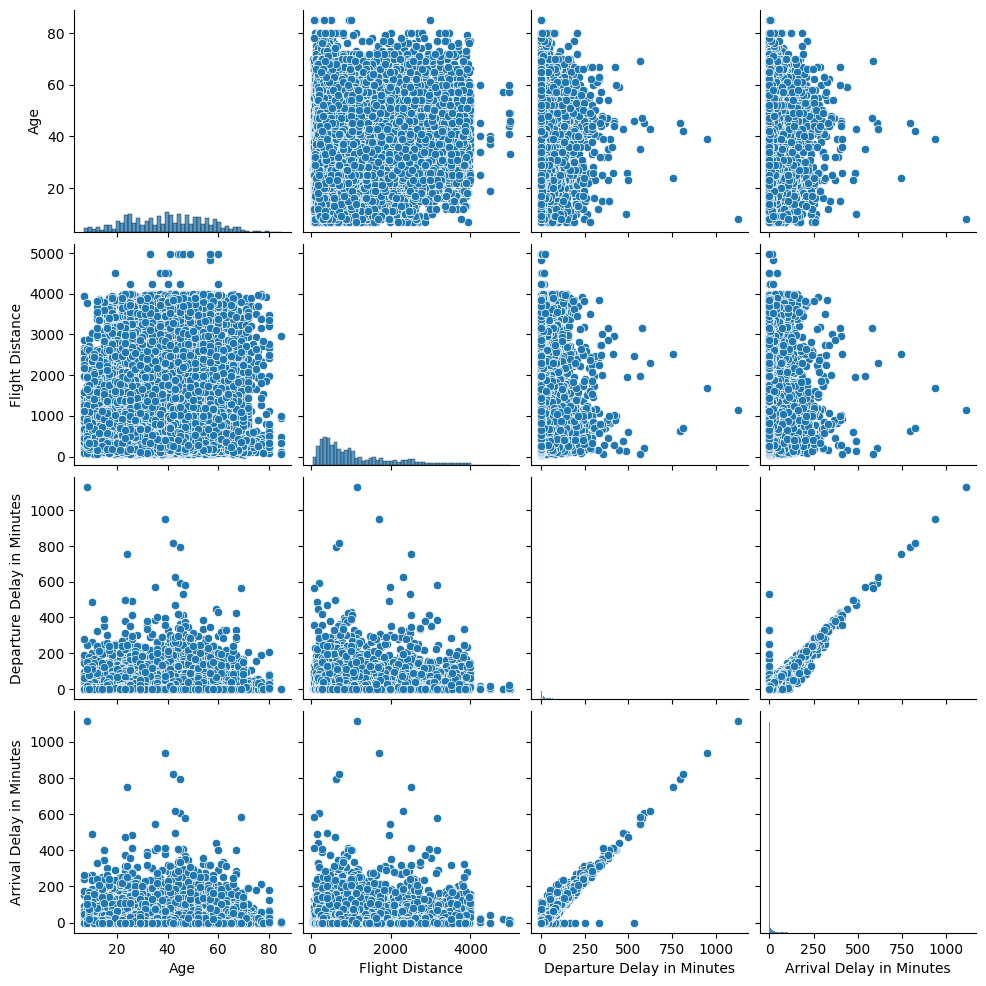

In [4]:
# TODO: Print the shape of the data

print(df.shape)

# TODO: Print the information about the dataframe

df.info()

# TODO: Display the summary statistics of the dataframe

display(df.describe())

# Removing unnecesary columns

df=df.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)

# TODO: Replace any NaN values in the dataframe with 0

df = df.fillna(0)

# TODO: Print the number of NaN values in each column of the dataframe

print(df.isna().sum())

# TODO: Create a pairplot using Seaborn library

sns.pairplot(df)
plt.show()


Note that we have used "display" command instead of "print" because in this way the output will be in the form of an organised and interactive table.

## Section 5. Model Building | Training

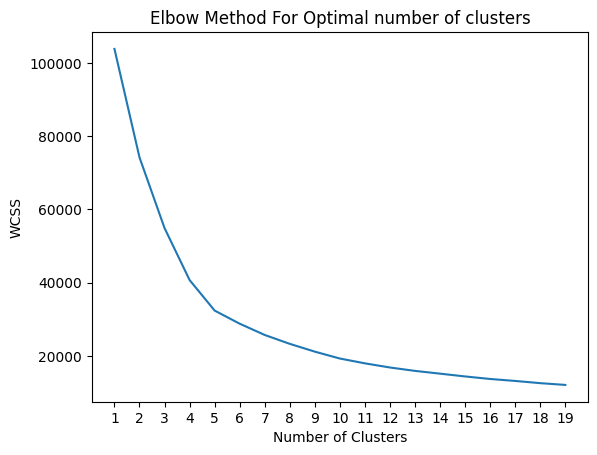

In [5]:
# TO DO: Implement the elbow method to determine the optimal number of clusters


# Normalizing the dataset
df = (StandardScaler().set_output(transform="pandas")).fit_transform(df)

# TO DO: Create a KMeans model for each number of clusters from 1 to 20

K= 20
km = []
for k in range(1, K):
  km.append(KMeans(n_clusters=k))

# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list

WCSS = []
for k in range(1, K):
  km[k-1].fit(df)
  WCSS.append(km[k-1].inertia_)

# TO DO: Plot the WCSS for each number of clusters

plt.plot(range(1, K), WCSS)
plt.xticks(range(1, K))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title('Elbow Method For Optimal number of clusters')
plt.show()


First, we have to normalize the dataset in order to get correct results and show that all features have the same value. Also we don't need to encode the elements from strings to numbers, because the features left after removing unnecessary ones, were already numbers and not strings. Note that we have forced the StandardScaler to return the output in pandas type.



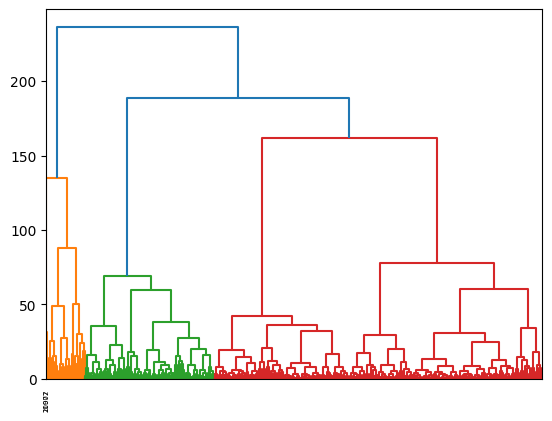

In [6]:
# TO DO: Create a dendrogram using hierarchical clustering


# TO DO: Use the ward method to calculate linkage

linkage = sch.linkage(df, method='ward', metric='euclidean')

# TO DO: Plot the dendrogram

sch.dendrogram(linkage)
plt.xticks(range(1, K))
plt.show()


## Section 6. K Means Clustering

In [7]:
# TO DO: Create a KMeans model with the best number of clusters

k_best = 5
km = KMeans(n_clusters=k_best)

# TO DO: Fit the KMeans model to the data and assign the resulting
# cluster labels to a new column in the dataframe

# Fitting to the dataset
km = km.fit(df)
# Predicting the labels
predict = km.predict(df)

# Assigning the labels to a new column
df['KMeans Cluster Label'] = pd.Series(predict, index=df.index)


## Section 7. Agglomerative Clustering

In [8]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage

a = AgglomerativeClustering(n_clusters=k_best, affinity='euclidean', linkage='ward')

# TO DO: Fit the Agglomerative Clustering model to the data and assign
# the resulting cluster labels to a new column in the dataframe

labels = a.fit_predict(df)

df['Agglomerative Cluster Label'] = pd.Series(labels, index=df.index)


## Section 8. Clusters Visualization

In [9]:
# TO DO: Remove outliers from the dataframe to improve visualization

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


To remove the outliers many methods can be used. Here we have used IQR parameter.

First we calculate the first and third quartiles (Q1, Q3) of the DataFrame. The first quartile is the value below which $25\%$ of the data falls.
The third quartile is the value below which $75\%$ of the data falls. IQR represents the spread of the middle $50\%$ of the data.

In the next step, we use boolean indexing and the any() function to identify rows that contain outliers based on the IQR method and by using "~" we keep everything but the found indeces.

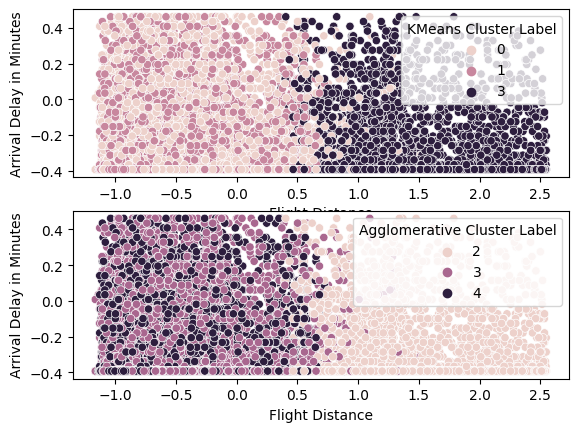

In [10]:
# TO DO: Create a scatter plot with subplots for each clustering method

num_clustering_methods = 2

fig = plt.figure()
ax = fig.subplots(num_clustering_methods, 1)

# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly

plt.subplot(num_clustering_methods, 1, 1)
sns.scatterplot(data=df, x="Flight Distance", y="Arrival Delay in Minutes", hue="KMeans Cluster Label")

plt.subplot(num_clustering_methods, 1, 2)
sns.scatterplot(data=df, x="Flight Distance", y="Arrival Delay in Minutes", hue="Agglomerative Cluster Label")

plt.show()

# Other features:
# Age
# Flight Distance
# Departure Delay in Minutes
# Arrival Delay in Minutes
